In [1]:
import os  
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /usr/lib/hive/lib/hive-hbase-handler.jar,/usr/lib/hbase/lib/*.jar pyspark-shell'  
  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import expanduser, join, abspath
from pyspark import SparkContext
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Job Query") \
    .config("hive.metastore.uris", "thrift://localhost:9083") \
    .enableHiveSupport().getOrCreate()

In [111]:
query = spark.sql("SELECT title, count(title) as count FROM job_python_hbase \
GROUP BY title ORDER BY count DESC LIMIT 15")

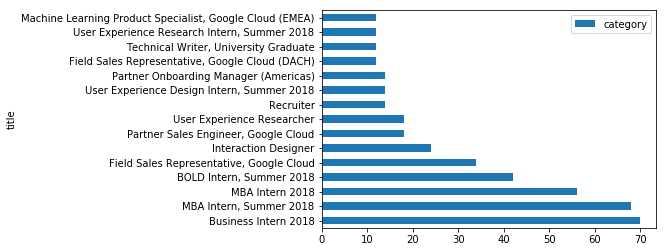

In [112]:
df = query.toPandas()
df.plot(kind='barh', x='title', label = 'category', y='count')


In [82]:
query1 = spark.sql("SELECT title, count(*) as soft from job_python_hbase WHERE category = 'Software Engineering'\
GROUP BY title ORDER BY soft DESC LIMIT 10")

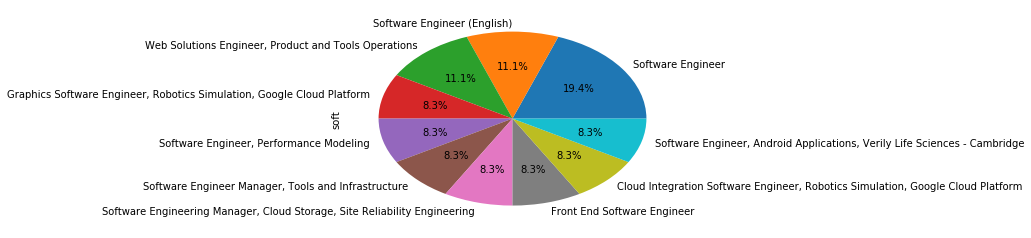

In [83]:
df = query1.toPandas()
df.plot(kind='pie',labels=df['title'],y='soft',autopct='%1.1f%%', legend = False)



In [80]:
query2 = spark.sql("SELECT count(*) as count, location FROM job_python_hbase \
GROUP BY location ORDER BY count DESC LIMIT 15")

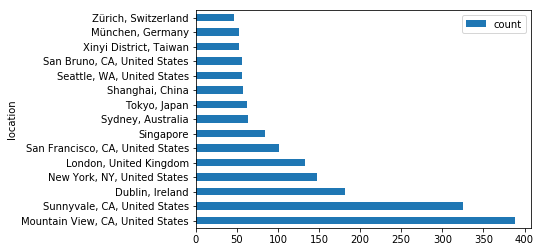

In [81]:
df = query2.toPandas()
df.plot(kind='barh', x='location', y='count')